# Pneumonia prediction using Chest X-ray
The dataset is organized into 3 folders and contains subfolders for each image category.We have total of 5232 chest X-ray images from children, including 3883 characterized pneumonia(2538 bacterial and 1345 viral)and 1349 normal, from a total of 5856 patients to train the AI system.

- The dataset is taken from https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from random import shuffle
import scipy
import cv2
from tqdm import tqdm
import skimage 
from skimage.transform import resize
import seaborn as sns
import random

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

### Getting some images of normal and pneumonia

In [28]:
total_images_train_normal = os.listdir('../chest_xray/train/NORMAL/')
total_images_train_pneumonia = os.listdir('../chest_xray/train/PNEUMONIA/')

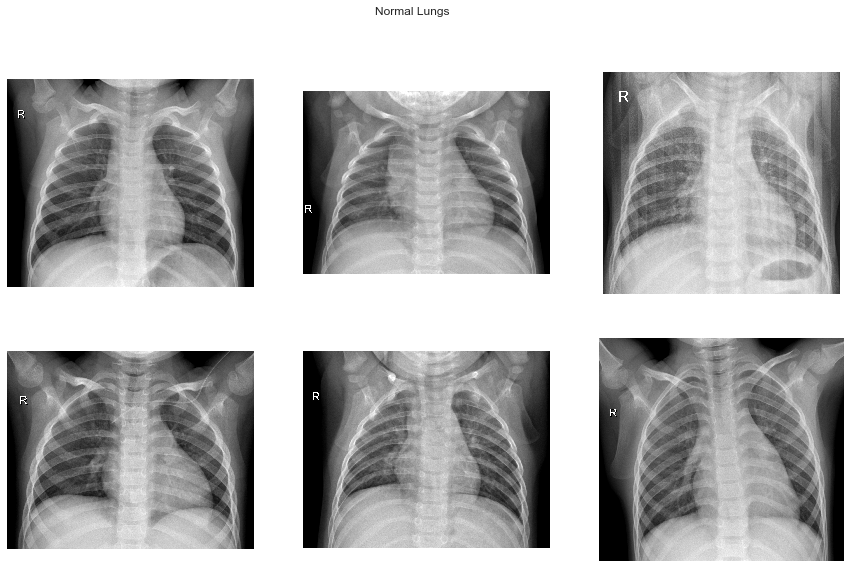

In [29]:
sample_normal = random.sample(total_images_train_normal,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../chest_xray/train/NORMAL/'+sample_normal[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Normal Lungs')
plt.show()

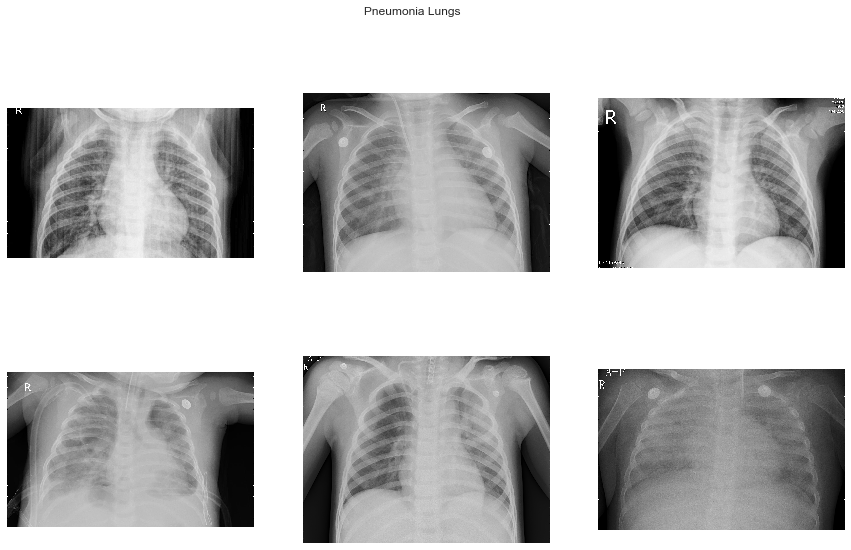

In [30]:
sample_pneumonia = random.sample(total_images_train_pneumonia,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../chest_xray/train/PNEUMONIA/'+sample_pneumonia[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Pneumonia Lungs')
plt.show()

## Finding difference btw Normal and Pneumonia x-rays

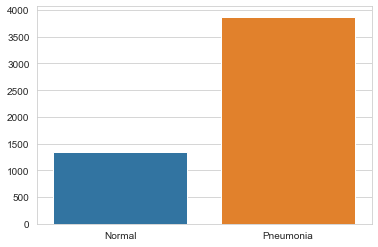

In [31]:
sns.set_style('whitegrid')
sns.barplot(x=['Normal','Pneumonia'],y=[len(total_images_train_normal),len(total_images_train_pneumonia)])

##### In the above plot we saw the diff btw normal and pneumonia which shows the data is imbalance since it is very common in medical side but we have to balance the data for that we are going to use data agumentation technique

## data agumentation on train set

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255, #before processing we do scaling it should btw 0to1,intially images contian with RGB
                                   shear_range=0.2, # it is for randomly applying shearing transformations(Shear angle in 
                                                         # counter-clockwise direction as radians)
                                   zca_whitening=True,
                                   zoom_range=0.2,
                                   width_shift_range=0.1, #it is range within which to randomly translate pictures vertically 
                                   height_shift_range=0.1, #it is range within which to randomly translate pictures horizontally
                                   horizontal_flip = True,# it is for randomly flipping half of the images horizontally
                                   vertical_flip= True, # it is for randomly flipping half of the images vertically
                                   fill_mode='nearest')#  

C:\Users\Administrator\.conda\envs\tf1\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [50]:
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2,)

In [51]:
training_set = train_datagen.flow_from_directory('../chest_xray/train/', target_size=(64,64), batch_size=32, class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [52]:
val_set = test_datagen.flow_from_directory('../chest_xray/val/', target_size=(64,64), batch_size=32, class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [53]:
test_set = test_datagen.flow_from_directory('../chest_xray/test/', target_size=(64,64), batch_size=32, class_mode = 'binary')

Found 624 images belonging to 2 classes.


## Buliding CNN

In [54]:
classifier = Sequential()

In [55]:

classifier.add(Convolution2D(32,(3,3), strides = 1 , padding = 'same', activation = 'relu',  input_shape = (64, 64,3)))

In [56]:
classifier.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding = 'same'))

In [57]:
classifier.add(Convolution2D(64, (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding = 'same'))

In [58]:
classifier.add(Convolution2D(128 ,(3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding = 'same'))

In [59]:
classifier.add(Convolution2D(256, (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding = 'same'))

In [60]:
classifier.add(Flatten())

In [61]:
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

C:\Users\Administrator\.conda\envs\tf1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\.conda\envs\tf1\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 256)        

In [63]:
### Compiling the CNN

In [64]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [65]:
train = classifier.fit_generator(training_set, samples_per_epoch=5216,nb_epoch=25,validation_data = val_set, nb_val_samples=16)
classifier.save_weights('first_try.h5')

C:\Users\Administrator\.conda\envs\tf1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\.conda\envs\tf1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=163, epochs=25, validation_steps=16)`
  """Entry point for launching an IPython kernel.



Epoch 1/25


C:\Users\Administrator\.conda\envs\tf1\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Administrator\.conda\envs\tf1\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


163/163 [==============================] - 263s 2s/step - loss: 0.5339 - accuracy: 0.7444 - val_loss: 0.5897 - val_accuracy: 0.8125
Epoch 2/25
163/163 [==============================] - 102s 624ms/step - loss: 0.3103 - accuracy: 0.8662 - val_loss: 0.5357 - val_accuracy: 0.7500
Epoch 3/25
163/163 [==============================] - 104s 636ms/step - loss: 0.2670 - accuracy: 0.8848 - val_loss: 0.6164 - val_accuracy: 0.6250
Epoch 4/25
163/163 [==============================] - 103s 632ms/step - loss: 0.2109 - accuracy: 0.9160 - val_loss: 1.1044 - val_accuracy: 0.6875
Epoch 5/25
163/163 [==============================] - 103s 635ms/step - loss: 0.2068 - accuracy: 0.9172 - val_loss: 0.7451 - val_accuracy: 0.6875
Epoch 6/25
163/163 [==============================] - 104s 635ms/step - loss: 0.1737 - accuracy: 0.9314 - val_loss: 0.8104 - val_accuracy: 0.6875
Epoch 7/25
163/163 [==============================] - 103s 631ms/step - loss: 0.1872 - accuracy: 0.9258 - val_loss: 0.7196 - val_accuracy:

In [49]:
# Analysis after Model Training on validation data set


In [66]:
accuracy=train.history['accuracy']
val_acc=train.history['val_accuracy']
loss=train.history['loss']
val_loss=train.history['val_loss']
epochs=list(range(25))

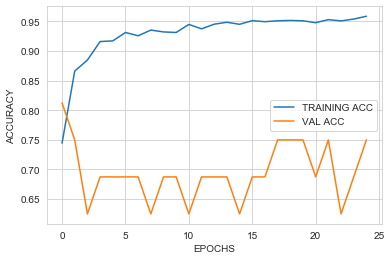

In [67]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(epochs,val_acc)
plt.legend(['TRAINING ACC','VAL ACC'])
plt.show()

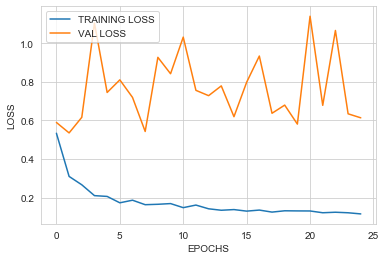

In [68]:
import matplotlib.pyplot as plt
plt.plot(epochs,loss)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.plot(epochs,val_loss)
plt.legend(['TRAINING LOSS','VAL LOSS'])
plt.show()

In [69]:
tarin2=classifier.fit_generator(training_set, samples_per_epoch=5216,nb_epoch=25,validation_data = test_set, nb_val_samples=624)
classifier.save_weights('first_try1.h5')

C:\Users\Administrator\.conda\envs\tf1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\.conda\envs\tf1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=163, epochs=25, validation_steps=624)`
  """Entry point for launching an IPython kernel.


Epoch 1/25
163/163 [==============================] - 429s 3s/step - loss: 0.1167 - accuracy: 0.9571 - val_loss: 0.2813 - val_accuracy: 0.8928
Epoch 2/25
163/163 [==============================] - 450s 3s/step - loss: 0.1177 - accuracy: 0.9563 - val_loss: 0.3795 - val_accuracy: 0.9214
Epoch 3/25
163/163 [==============================] - 460s 3s/step - loss: 0.1005 - accuracy: 0.9638 - val_loss: 0.0769 - val_accuracy: 0.9020
Epoch 4/25
163/163 [==============================] - 432s 3s/step - loss: 0.1142 - accuracy: 0.9557 - val_loss: 0.6438 - val_accuracy: 0.8736
Epoch 5/25
163/163 [==============================] - 429s 3s/step - loss: 0.1052 - accuracy: 0.9605 - val_loss: 1.3484 - val_accuracy: 0.9022
Epoch 6/25
163/163 [==============================] - 455s 3s/step - loss: 0.1119 - accuracy: 0.9571 - val_loss: 0.1564 - val_accuracy: 0.9231
Epoch 7/25
163/163 [==============================] - 490s 3s/step - loss: 0.1094 - accuracy: 0.9592 - val_loss: 0.1366 - val_accuracy: 0.9088

In [ ]:
### Analysis after Model Training on test data set

In [70]:
accuracy1=tarin2.history['accuracy']
val_acc1=tarin2.history['val_accuracy']
loss1=tarin2.history['loss']
val_loss1=tarin2.history['val_loss']
epochs1=list(range(25))

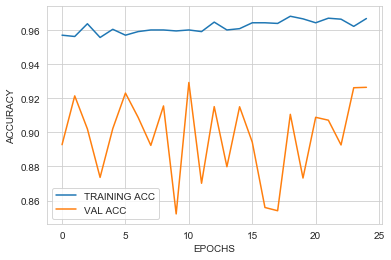

In [71]:
import matplotlib.pyplot as plt
plt.plot(epochs1,accuracy1)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(epochs1,val_acc1)
plt.legend(['TRAINING ACC','VAL ACC'])
plt.show()

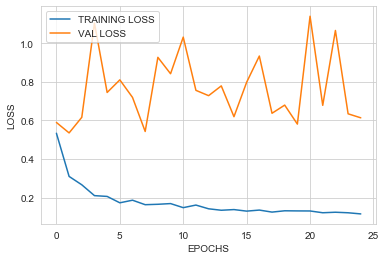

In [72]:
import matplotlib.pyplot as plt
plt.plot(epochs,loss)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.plot(epochs,val_loss)
plt.legend(['TRAINING LOSS','VAL LOSS'])
plt.show()



### Here i took one image and predicted whether this image belongs to pneumonia or not

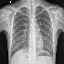

In [73]:
from keras.preprocessing import image
test_image = image.load_img('../chest_xray/IM-0016-0001-normal.jpeg',target_size=(64,64))
test_image

In [74]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)

In [75]:
result

array([[0.]], dtype=float32)

In [76]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

### result showing '0' - which means it is normal lungs